## Confidence Intervals

Frequetist: If you repeat something many times, and you compute the frequency of a current event. 

You compute the probrability density function $P(x)$, we want to describe the full probability, you can also compute the moments or the confidence intervals. 

$P(x_0 - \epsilon_-) = P(x_0 + \epsilon_+)$

$\int_{x_0 - \epsilon_-}^{x_0 + \epsilon_+}P(x) dx = f$, where $f$ is your cinfdence interval. 

In terms of the Heaviside function:

We are going to use this form:

$\int_{-\infty}^{\infty} P(x)H\left[P(x) - P(x_0 + \epsilon_+)\right]dx = f$

If the distribution function it's totally symmetric

$\int_{x_0 - \epsilon}^{x_0 + \epsilon}P(x) dx = f$

Often people use $\sigma$ to describe the confident interval, when people say this they are assuming a gaussian distribution.



$x_i = -N + 2\frac{i-1}{M-1}N$

Te integral will be:

$\frac{1}{\sqrt{2 \pi}} \sum_{i=1}^{M-1} \dfrac{1}{2} \left[g(x'_i) + g(x'_{i+1}) \right] \Delta x'$


$\frac{\Delta x}{\sqrt{2 \pi}} \sum_{i=2}^{M-1} g(x_i')$


For our particular example it would be:

$f(N\sigma) = \frac{\Delta x}{\sqrt{2 \pi}} \left[\dfrac{1}{2}g(x_1) +  \sum_{i=2}^{M-1} g(x_i') + \dfrac{1}{2}g(x_M)\right]$

$x_i = -N + 2\dfrac{i-1}{M-1}N$

$\Delta x_i = \dfrac{2N}{M-1}$


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def xi(N, M, i):
    x = -N + 2.0*(i-1)/(M-1)*N
    return x

def Dxi(N, M):
    dxi = 2.0*N/(float(M)-1)
    return dxi
    
def g(x):
    return exp(-x**2.0/2.0)
    
def Int(N, M):
    deltax = Dxi(N, M)
    xx = np.zeros(M)
    for i in range(M):
        xx[i] = xi(N, M, i)
    f = deltax / (np.sqrt(2.0*np.pi)) * (0.5*g(xx[0]) + sum(g(xx[1:-2])) + 0.5*g(xx[-1]))
    return f
    

In [3]:
print Int(1, 4096)
print Int(2, 4096)
print Int(3, 4096)
print Int(4, 4096)
print Int(5, 4096)

0.682571130742
0.954446671111
0.997293619776
0.999936389565
0.999999422925


In [4]:
p = np.zeros(10)
M = np.zeros(10)
for i in range(10000, 10):
    print i
    p[i] = 1.0 - Int(3, i+3)
    M[i] = i+2

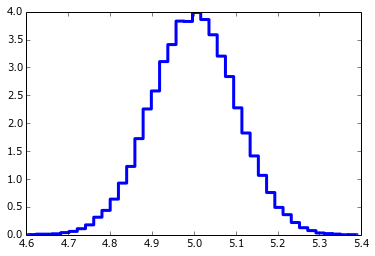

In [5]:
gauss = np.random.normal(5, 0.1, 40000)
h = hist(gauss, bins=40, histtype='step', lw=3, normed=True)

In [6]:
print len(h[0]), len(h[1])

40 41


In [7]:
Pmax = max(h[0])
print Pmax

3.98498168872


In [8]:
# Now from the histogram to the integral

def yi(ymin, ymax, M, i):
    y = ymin + (i-1.0)/(M-1.0) * (ymax - ymin)
    return y

def delta_y(ymax, ymin, M):
    dy = ymax-ymin/(M-1.0)
    return dy

def Pj(Pmax, k, j):
    pj = (j-1.0)/(k-1.0) * Pmax
    return pj

def Cj(L, ymax, ymin, K):
    Pmax = max(L[0])
    M = len(L[1])
    P_grid = np.zeros(K)

    for j in range(0, int(K)):
        P_grid[j] = Pj(Pmax,K, j+1)
    
    ddj = delta_y(ymax, ymin, M)
    H = np.zeros(M)
    cj = np.zeros(K)
    for j in range(K):
        for i in range(M):
            yii = yi(ymin, ymax, M, i)
            if L[0][yii]>Pj[Pmax,K, j ]:
                H[i] = L[i]
            else:
                H[i] = 0
        cj[j] = sum(H[2:-2])* delta_y
    return cj
    

In [12]:
yii = yi(4.6, 5.4, 10000.0, 30.0)
print yii, gauss[1]

4.60232023202 5.01621407862


In [144]:
Cj(h, 4.6, 5.4, 100)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:29: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


TypeError: 'function' object has no attribute '__getitem__'

plot cj vs pj

cj < c0 < cj+1

fing cj and cj+1


5. C= aP+b
cj+1 = aPj+1 + b
Cj = a Pj + b

P0 = Pj+1 - Pj /(Cj+1 - Cj) * (c0 - Cj) + Pj

6. Find i : Piz P0 >Pi+1

7. for each value of this i 
y = yi+1 - yi1 /(Pi+1 - Pi) * (P0-Pi) + yi

In [139]:
K = 100.0
P_grid = np.zeros(K)
for j in range(0, int(K)):
    P_grid[j] = Pj(Pmax, 100, j+1)
print P_grid

[ 0.          0.04036267  0.08072534  0.12108801  0.16145069  0.20181336
  0.24217603  0.2825387   0.32290137  0.36326404  0.40362671  0.44398938
  0.48435206  0.52471473  0.5650774   0.60544007  0.64580274  0.68616541
  0.72652808  0.76689076  0.80725343  0.8476161   0.88797877  0.92834144
  0.96870411  1.00906678  1.04942946  1.08979213  1.1301548   1.17051747
  1.21088014  1.25124281  1.29160548  1.33196815  1.37233083  1.4126935
  1.45305617  1.49341884  1.53378151  1.57414418  1.61450685  1.65486953
  1.6952322   1.73559487  1.77595754  1.81632021  1.85668288  1.89704555
  1.93740823  1.9777709   2.01813357  2.05849624  2.09885891  2.13922158
  2.17958425  2.21994692  2.2603096   2.30067227  2.34103494  2.38139761
  2.42176028  2.46212295  2.50248562  2.5428483   2.58321097  2.62357364
  2.66393631  2.70429898  2.74466165  2.78502432  2.825387    2.86574967
  2.90611234  2.94647501  2.98683768  3.02720035  3.06756302  3.10792569
  3.14828837  3.18865104  3.22901371  3.26937638  3.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [125]:
def integral(a, b, f):
    low = abs(f[1] - a)
    high = abs(f[1] - b)
    index_low = np.where(low == min(low))[0]
    index_high = np.where(high == min(high))[0]
    dl = f[0][index_low]
    dh = f[0][index_high]
    dt = abs(f[1][index_low+1] - f[1][index_low])
    I = sum(f[0][index_low:index_high]) * dt
    return I